# 

In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("./data/MNIST_data/", one_hot=True)

Extracting ./data/MNIST_data/train-images-idx3-ubyte.gz
Extracting ./data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./data/MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
mnist.train.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [6]:
mnist.train.num_examples

55000

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
single_image = mnist.train.images[1].reshape(28, 28)

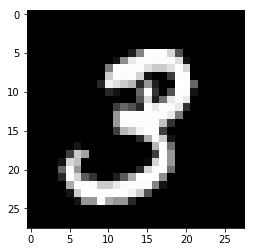

In [10]:
plt.imshow(single_image, cmap='gist_gray')

In [11]:
#Verificar intervalo
single_image.min()
single_image.max()

0.0

### Criando placeholders e variaveis

In [14]:
x = tf.placeholder(tf.float32, shape=[None, 784])

W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

### Criando grafo de operaçoes

In [15]:
y = tf.matmul(x,W) + b

### Loss Function

In [16]:
y_true = tf.placeholder(tf.float32, [None, 10])

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y))

### Otimizador

In [18]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(cross_entropy)

### Criar e iniciar sessao

In [19]:
init = tf.global_variables_initializer()

In [20]:
with tf.Session() as sess:
    sess.run(init)
    for step in range(1000):
        batch_x, batch_y = mnist.train.next_batch(100)
        sess.run(train,feed_dict={x:batch_x, y_true:batch_y})
        
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_true, 1))
    acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    print(sess.run(acc, feed_dict={x:mnist.test.images, y_true:mnist.test.labels}))

0.916
